# Final Project of Introduction to Bioinformatics

## Comparative Mitochondrial Genomics and Phylogenetic Analysis



This task focuses on the comparative analysis of mitochondrial genomes from different species, primarily birds, mammals, and insects. The aim is to understand the evolutionary relationships between these species by analyzing and comparing their mitochondrial DNA, which is about 16,000 base pairs in length. You will use advanced computational methods to construct phylogenetic trees and delve into the ecological and anthropological insights that can be gleaned from this data. This project is designed to provide a comprehensive understanding of mitochondrial genomics, its importance in evolutionary biology, and its applications in broader scientific contexts.

You will learn:

- Techniques for aligning and comparing mitochondrial DNA sequences.
- How to construct and interpret phylogenetic trees using advanced computational methods.
- The application of mitochondrial genomics in understanding ecological interactions and human evolutionary history.

#### Task Roadmap

1. **Mitochondrial Genome Comparison**:
   - Align mitochondrial DNA sequences from the provided dataset.
   - Analyze these sequences to identify similarities and differences across species.

2. **Phylogenetic Analysis Using Advanced Methods**:
   - Apply Maximum Likelihood (ML) and Bayesian Inference methods, utilizing tools like `ETE Toolkit`, `DendroPy`, `BEAST`, or `PyRate`.
   - Compare the trees generated by these methods to understand how different approaches can lead to different interpretations of the data.

3. **Cross-Disciplinary Applications (Bonus)**:
   - **Ecology**: Examine how mitochondrial DNA analysis can reveal information about species adaptation, migration, and conservation. This involves understanding how genetic variation within and between species can inform ecological strategies and conservation efforts.
   - **Anthropology**: Investigate the use of mitochondrial DNA in tracing human evolution and migration patterns. This includes studying the mitochondrial DNA of mammals in your dataset to draw parallels with human evolutionary studies.

### Data Sources

The mitochondrial DNA data for birds, mammals, and insects will be provided to you. This dataset has been curated to facilitate a comprehensive comparative analysis and is essential for the completion of your phylogenetic studies.

### Useful Resources and Material

- [Mitochondrial DNA - Wikipedia](https://en.wikipedia.org/wiki/Mitochondrial_DNA): A general introduction to the structure, function, origin, and diversity of mitochondrial DNA, as well as its applications in various fields such as medicine, forensics, and anthropology.
- [Mitochondrial DNA Analysis: Introduction, Methods, and Applications](https://bioinfo.cd-genomics.com/mitochondrial-dna-analysis-introduction-methods-and-applications.html): An explanation of the basics of mitochondrial DNA sequencing, bioinformatics analysis, heteroplasmy, and advantages of mitochondrial DNA analysis over nuclear DNA analysis.
- [Phylogenetic Tree- Definition, Types, Steps, Methods, Uses - Microbe Notes](https://microbenotes.com/phylogenetic-tree/): A coverage of the concepts and methods of phylogenetic tree construction, including the types of phylogenetic trees, the steps involved in phylogenetic analysis, the main methods of phylogenetic inference, and the applications of phylogenetic trees in various disciplines.
- [Phylogenetics - Wikipedia](https://en.wikipedia.org/wiki/Phylogenetics): An overview of the field of phylogenetics, which is the study of the evolutionary history and relationships among or within groups of organisms. It also discusses the data sources, models, algorithms, software, and challenges of phylogenetic analysis.
- [ETE Toolkit](http://etetoolkit.org/): A Python library for manipulating, analyzing, and visualizing phylogenetic trees. It supports various formats, methods, and tools for phylogenetic analysis, such as alignment, tree inference, tree comparison, tree annotation, and tree visualization.
- [DendroPy](https://dendropy.org/): Another Python library for phylogenetic computing. It provides a comprehensive API for working with phylogenetic data structures, such as trees, characters, and networks. It also offers a rich set of functions for simulation, manipulation, analysis, and annotation of phylogenetic data.

### Exploration and Reflection

As we proceed with our analysis of mitochondrial DNA for phylogenetic tree construction, it is valuable to contemplate a few questions. These inquiries aim to facilitate a more thorough understanding of the roles and characteristics of mitochondrial DNA in the context of evolutionary biology:

1. **Maternal Inheritance and Its Implications**: How does the maternal inheritance of mitochondrial DNA simplify our understanding of evolutionary lineage compared to nuclear DNA, which undergoes recombination? What unique insights can this aspect provide in tracing the evolutionary history of species?

2. **Mutation Rate and Evolutionary Insights**: Mitochondrial DNA mutates at a faster rate than nuclear DNA. How does this characteristic make mtDNA a more sensitive tool for detecting recent evolutionary events and relationships among closely related species? Can you think of any specific scenarios or studies where this property of mtDNA has been particularly instrumental?

Reflect on these questions as you work through the project, and consider how the properties of mitochondrial DNA enhance its value and applicability in evolutionary biology and beyond. Provide your answer either in this notebook, or in your report (if you had one).

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

### Step 0: Installing Necessary Packages

In [2]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython (1.83) is installed
pandas (2.1.3) is installed
numpy (1.26.2) is installed


In [4]:
# Import necessary libraries. 
import pandas as pd
import numpy as np

### Step 1: Dataset Expansion

Our first task is to augment our dataset with additional species. This involves engaging with the NCBI database to retrieve mitochondrial DNA sequences.

#### Instructions:

- **Species Selection**: Identify and choose 10 additional species to include in your dataset. Aim for a diverse selection to enrich your phylogenetic analysis.

- **Querying NCBI Database**: Use the NCBI database to locate mitochondrial DNA sequences for your chosen species. While you can manually search on the [NCBI website](https://www.ncbi.nlm.nih.gov/), consider automating this process through their API for a more efficient approach.
    - **Example Query**: As a starting point, you might use a query like `"mitochondrion[Filter] AND (your_species_name[Organism])` to find specific mtDNA sequences. Adjust the query parameters according to your species selection.
    - **Documentation**: Familiarize yourself with the [NCBI API documentation](https://www.ncbi.nlm.nih.gov/books/NBK25497/) for detailed guidance on constructing queries.

- **Using NCBI Website**: You are welcome to use the NCBI website for this task. If you do so, document each step of your process clearly in your task report. This should include the species names, search terms used, and how you determined the relevant sequences to include.

- **Bonus Opportunity**: Implementing an automated, methodological approach using the NCBI API and relevant Python packages to add all 10 records in your dataset will earn you a 50% bonus for this section. Your method should be structured and replicable, demonstrating a systematic approach to data collection.

Remember, the goal is to methodically expand your dataset with relevant mtDNA sequences, paving the way for insightful phylogenetic analysis.

In [5]:
dataset = pd.read_csv('./dataset/species.csv')

dataset.head()

,taxo_id,specie,blast_name,genbank_common_name,accession_number,mtDNA
0,8945,Eudynamys scolopaceus,birds,Asian koel,NC_060520,https://www.ncbi.nlm.nih.gov/nucleotide/NC_060...
1,7460,Apis mellifera,Bees,honey bee,NC_051932,https://www.ncbi.nlm.nih.gov/nucleotide/NC_051...
2,36300,Pelecanus crispus,birds,Dalmatian pelican,OR620163,https://www.ncbi.nlm.nih.gov/nuccore/OR620163.1
3,10116,Rattus norvegicus,Rodents,Norway rat,NC_001665,https://www.ncbi.nlm.nih.gov/nuccore/NC_001665
4,9031,Gallus gallus,birds,Gallus gallus,NC_053523,https://www.ncbi.nlm.nih.gov/nuccore/NC_053523.1


In [6]:
import pandas as pd
import requests



### My codes:

In [7]:
from Bio import Entrez, SeqIO
Entrez.email = "alizaden.1379@gmail.com" 
handle = Entrez.einfo()
rec = Entrez.read(handle)
handle.close()
print(rec.keys())

dict_keys(['DbList'])


In [8]:
rec['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [9]:
## functions to get data from NCBI, given specie name
# get taxonomy Id from specie name
def get_taxonomy_id(species):
    search = Entrez.esearch(term=species, db="taxonomy", retmode="xml")
    record = Entrez.read(search)
    return record['IdList'][0]


In [10]:
# get blast name and genbank name from tax id:
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
from io import BytesIO
import requests

def fetch_entrez_record(db, id, rettype, retmode):
    """Fetch record from NCBI Entrez with retries."""
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db={db}&id={id}&rettype={rettype}&retmode={retmode}"
    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))

    try:
        response = session.get(url)
        response.raise_for_status()
        if db == "nucleotide":
            return response.text
        return response.content
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error: {err}")
    except requests.exceptions.ConnectionError as err:
        print(f"Connection error: {err}")
    return None

def get_blast_genbank_name_from_taxid(taxonomy_id):
    xml_data = fetch_entrez_record("taxonomy", taxonomy_id, "xml", "xml")
    if xml_data:
        # Convert bytes data to a binary file-like object
        xml_data_io = BytesIO(xml_data)
        records = Entrez.read(xml_data_io)
        if len(records[0]['OtherNames']['CommonName'])>0:
            blast_name=records[0]['OtherNames']['CommonName'][0]
        else:
            blast_name=records[0]['OtherNames']['GenbankCommonName']
        genbank_name=records[0]['OtherNames']['GenbankCommonName']
        return blast_name,genbank_name


In [11]:
# get accession number from specie name
def get_accession_number(species):
    search = Entrez.esearch(term=f"{species}[Orgn] AND mitochondrion[Filter]", db="nucleotide", retmode="xml")
    record = Entrez.read(search)
    id_list = record['IdList']
    
    if id_list:
        handle = Entrez.efetch(db="nucleotide", id=id_list[0], rettype="gb", retmode="text")
        record = SeqIO.read(handle, "genbank")
        return record.id
    else:
        return None


In [12]:
## final function to create a row for dataset given specie name
def get_info(specie):
    tax_id=get_taxonomy_id(specie)
    blast_name,genbank_name=get_blast_genbank_name_from_taxid(tax_id)
    accession_number=get_accession_number(specie)
    link="https://www.ncbi.nlm.nih.gov/nuccore/"+accession_number
    return {'taxo_id': tax_id,
            'specie': specie,
            'blast_name':blast_name,
            'genbank_common_name':genbank_name,
            'accession_number':accession_number.split('.')[0],
            'mtDNA':link}

In [17]:
# species are cat, dog, fox, butterfly, lion, ladybug, pigeon, eastern gorilla, asian elephant, tiger
species=['Felis catus','Canis lupus','Vulpes vulpes','Lepidoptera','Panthera leo','Coccinellidae','Columba livia','Gorilla beringei','Elephas maximus','Panthera tigris']

In [18]:
expanded_dataset=dataset.copy()

In [19]:
for specie in species:
    info=get_info(specie)
    expanded_dataset.loc[len(expanded_dataset)]=info
expanded_dataset

,taxo_id,specie,blast_name,genbank_common_name,accession_number,mtDNA
0,8945,Eudynamys scolopaceus,birds,Asian koel,NC_060520,https://www.ncbi.nlm.nih.gov/nucleotide/NC_060...
1,7460,Apis mellifera,Bees,honey bee,NC_051932,https://www.ncbi.nlm.nih.gov/nucleotide/NC_051...
2,36300,Pelecanus crispus,birds,Dalmatian pelican,OR620163,https://www.ncbi.nlm.nih.gov/nuccore/OR620163.1
3,10116,Rattus norvegicus,Rodents,Norway rat,NC_001665,https://www.ncbi.nlm.nih.gov/nuccore/NC_001665
4,9031,Gallus gallus,birds,Gallus gallus,NC_053523,https://www.ncbi.nlm.nih.gov/nuccore/NC_053523.1
5,59463,Myotis lucifugus,bats,little brown bat,NC_029849,https://www.ncbi.nlm.nih.gov/nuccore/NC_029849.1
6,7070,Tribolium castaneum,Insects,Tribolium castaneum,NC_003081,https://www.ncbi.nlm.nih.gov/nuccore/NC_003081
7,8845,Anser cygnoides,birds,Swan goose,NC_023832,https://www.ncbi.nlm.nih.gov/nucleotide/NC_023...
8,9940,Ovis aries,sheep,even-toed ungulates,NC_001941,https://www.ncbi.nlm.nih.gov/nuccore/NC_001941
9,56313,Tyto alba,birds,common barn owl,MZ318036,https://www.ncbi.nlm.nih.gov/nuccore/MZ318036.1


In [20]:
expanded_dataset.to_csv('./dataset/expanded_dataset.csv', index=False)

In [21]:
dataset=expanded_dataset

#### Checking Data Consistency

The code block is designed to check the accuracy of a biological dataset. It examines each entry in a CSV file, focusing on taxonomy IDs, species names, GenBank accession numbers, and mitochondrial DNA links. It uses the NCBI's Entrez system to ensure taxonomy IDs correspond to the correct species and confirms the mitochondrial DNA links are accurate. The script also checks GenBank accession numbers against the provided links. This method is useful for maintaining the accuracy of current data and **might help in adding new entries to the database.**

In [22]:
import pandas as pd
import requests
from Bio import Entrez
import os
from io import BytesIO
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# Set your email and API key for NCBI
entrez_email = os.getenv('ENTREZ_EMAIL')  
entrez_key = os.getenv('ENTREZ_API_KEY')
Entrez.email = entrez_email 

def fetch_entrez_record(db, id, rettype, retmode):
    """Fetch record from NCBI Entrez with retries."""
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db={db}&id={id}&rettype={rettype}&retmode={retmode}"
    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))

    try:
        response = session.get(url)
        response.raise_for_status()
        if db == "nucleotide":
            return response.text
        return response.content
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error: {err}")
    except requests.exceptions.ConnectionError as err:
        print(f"Connection error: {err}")
    return None

def verify_taxonomy_id(taxo_id, species_name):
    """Verify taxonomy ID against species name."""
    xml_data = fetch_entrez_record("taxonomy", taxo_id, "xml", "xml")
    if xml_data:
        # Convert bytes data to a binary file-like object
        xml_data_io = BytesIO(xml_data)
        records = Entrez.read(xml_data_io)
        return records[0]['ScientificName'].lower() == species_name.lower()
    return False

def verify_mitochondrial_dna(accession_number):
    gb_data = fetch_entrez_record("nucleotide", accession_number, "gb", "text")
    return "mitochondrion" in gb_data.lower() if gb_data else False

def extract_accession_from_link(link):
    return link.split('/')[-1].split('.')[0]

def check_dataset_consistency(file_path):
    species_df = pd.read_csv(file_path)

    for index, row in species_df.iterrows():
        taxonomy_id = str(row['taxo_id'])
        species_name = row['specie']
        accession_number = row['accession_number']
        mtDNA_link = row['mtDNA']
        extracted_accession = extract_accession_from_link(mtDNA_link)

        taxonomy_check = verify_taxonomy_id(taxonomy_id, species_name)
        accession_match = (accession_number == extracted_accession)
        mitochondrial_check = verify_mitochondrial_dna(accession_number)

        print(f"Row {index}: Taxonomy Check: {taxonomy_check}, Accession Match: {accession_match}, Mitochondrial Check: {mitochondrial_check}")
        

In [23]:
check_dataset_consistency('./dataset/expanded_dataset.csv')

Row 0: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 1: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 2: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 3: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 4: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 5: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 6: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 7: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 8: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 9: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 10: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 11: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 12: Taxonomy Check: True, Accession Match: True, Mitochond

### Step 3: Sequence Download and Preparation

The next step in our project involves downloading the mitochondrial DNA sequences for each species and preparing them for analysis.

#### Instructions:

- **Download mtDNA Sequences**: Write a script to download the mtDNA sequences from the links provided in your dataset. The sequences should be in FASTA format, which is the standard for nucleotide sequences.

- **Sequence Labeling**: Properly label each sequence within the FASTA file. This header, starting with '>', should include the species name and any other relevant information (e.g., `>Eudynamys_scolopaceus_NC_060520`). This is crucial for identifying the sequences in subsequent analysis.

- **Concatenate Sequences**:
    - Create a script to concatenate all downloaded sequences into a single `.fasta` or `.fna` file. 
    - Ensure each sequence in the file is clearly separated by its header line, which is important for differentiating the sequences of various species.

#### Tips for Writing the Download and Concatenation Script:
- Use Python libraries such as `httpx` or `requests`, or any other tool you prefer for downloading sequences. For processing FASTA files you can use a wide range of tools. One recommended option is `Biopython` library.
- Use a loop to go through each link in the dataset, download the sequence, and append it to your concatenated file.
- Maintain the format integrity of the FASTA file, ensuring each sequence is correctly associated with its header.


In [24]:
# TODO: Write a function to download mtDNA sequences
# def download_mtDNA(url, label):
    # Code to download and label the sequence
from Bio import Entrez

def download_sequence(accession_number):
    Entrez.email = "your_email@example.com"
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
    seq = handle.read()
    return seq


In [25]:

# TODO: Loop through the dataset and download each mtDNA sequence
file=open('Sequences.fasta','w')
for index, row in dataset.iterrows():
    accession_number=row['accession_number']
    sequence=download_sequence(accession_number)
    file.write(sequence)

file.close()

### Step 4: Sequence Alignment

After downloading the mitochondrial DNA sequences, the next critical step is their alignment. This process allows us to compare the sequences and discern the evolutionary relationships among the species.

#### Instructions:

- **Select an Alignment Tool**: Choose one of the following alignment tools based on your project needs. Each tool has its strengths and is widely used in bioinformatics for multiple sequence alignment.

1. **MAFFT**:
    - **Brief Introduction**: MAFFT (Multiple Alignment using Fast Fourier Transform) is renowned for its speed and efficiency, particularly suitable for large datasets.
    - **Resources**:
        - [MAFFT Official Documentation](https://mafft.cbrc.jp/alignment/software/)
        - [Example Usage on GitHub](https://github.com/MountainMan12/SARS-Cov2-phylo)
        - [Relevant Notebook](https://colab.research.google.com/github/pb3lab/ibm3202/blob/master/tutorials/lab03_phylo.ipynb)

2. **Clustal Omega**:
    - **Brief Introduction**: Clustal Omega offers high-quality alignments and is user-friendly, ideal for those new to sequence alignment.
    - **Resources**:
        - [A Python wrapper around Clustal Omega](https://github.com/benchling/clustalo-python)
        - [Clustal Omega Official Website](http://www.clustal.org/omega/)

3. **MUSCLE**:
    - **Brief Introduction**: MUSCLE (Multiple Sequence Comparison by Log-Expectation) is known for its balance between speed and accuracy, making it a versatile choice for various datasets.
    - **Resources**:
        - [MUSCLE Documentation](https://drive5.com/muscle5/manual/)

- **Perform Sequence Alignment**: Utilize your chosen tool to align the downloaded mtDNA sequences. This alignment is foundational for the accurate construction of phylogenetic trees.

- **Save Aligned Sequences**: After alignment, save the output in an appropriate format for further analysis in the subsequent steps of this project.

#### MAFFT

In [27]:
# TODO: Install and import the alignment tool
# !pip install mafft
# from Bio.Align.Applications import MafftCommandline
from Bio.Align.Applications import MafftCommandline,ClustalOmegaCommandline
import shutil
# TODO: Perform the sequence alignment
# def perform_alignment(input_file, output_file):
    # Code to align sequences using the chosen tool
def perform_alignment(input_file, output_file):
    shutil.copyfile(input_file,'tools/mafft-7.520-win64-signed/mafft-win/'+input_file)
    mafft_cline = MafftCommandline(cmd='D:/University/bioinformatics/project/Bio-project/mitochondrial-comparison-phylogenetic-construction/tools/mafft-7.520-win64-signed/mafft-win/mafft.bat',input=input_file)
    stdout, stderr = mafft_cline()  
    output=open(output_file, "w")
    output.write(stdout)
    output.close()



d:\applications\python\Lib\site-packages\Bio\Application\__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [28]:
# TODO: Align your downloaded sequences
# perform_alignment('path_to_downloaded_sequences.fasta', 'aligned_sequences.fasta')
perform_alignment("Sequences.fasta", "Aligned_sequences.fasta")


### Step 5: Phylogenetic Tree Construction

The next phase in our project involves constructing phylogenetic trees to visualize and analyze the evolutionary relationships among the species. We will use three distinct methods, each providing unique insights.

#### Phylogenetic Tree Construction Methods:

1. **Bayesian Inference Trees**:
    - **Overview**: This method uses Bayesian statistics to estimate the likelihood of different evolutionary histories. It's particularly useful for its ability to estimate branch lengths and support values.
    - **Tools**: MrBayes, BEAST
        - MrBayes ([Official Website](https://nbisweden.github.io/MrBayes/manual.html/)) is widely recognized for its robustness in Bayesian inference.
        - BEAST2 ([BEAST Software](https://www.beast2.org/)) is another powerful tool, offering advanced features for complex evolutionary models.

2. **Maximum Likelihood Trees**:
    - **Overview**: Maximum Likelihood methods evaluate tree topologies based on the likelihood of observed data given a tree model. It's known for its statistical rigor and accuracy.
    - **Tools**: RAxML, PhyML
        - RAxML ([RAxML GitHub](https://github.com/stamatak/standard-RAxML)) is preferred for large datasets due to its efficiency.
        - PhyML ([PhyML Documentation](http://www.atgc-montpellier.fr/phyml/)) offers a balance of speed and accuracy, with a user-friendly interface.

3. **Neighbor-Joining Trees**:
    - **Overview**: The Neighbor-Joining method is a distance-based approach that constructs phylogenetic trees by evaluating the genetic distance between sequences. It is known for its speed and simplicity, making it well-suited for initial exploratory analyses.
    - **Tools**: 
        - MEGA: A versatile tool specifically used here for constructing Neighbor-Joining trees. It's recognized for its ease of use and effectiveness in phylogenetic analysis. [MEGA Software](https://www.megasoftware.net/)


In [29]:
# TODO: Import necessary libraries for tree construction
# from Bio import Phylo
# from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


# TODO: Construct a phylogenetic tree using the Neighbor Joining method
# def construct_tree_NJ(aligned_sequences):
    # Implement the tree construction using Neighbor Joining
def construct_tree_NJ(input_file, output_file):
    alignment = AlignIO.read(input_file, "fasta")
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    Phylo.write(tree, output_file, 'newick')

construct_tree_NJ("Aligned_sequences.fasta", "trees/nj-tree.newick")



In [35]:
# converting fasta to Nexus
from Bio import AlignIO,SeqIO, Nexus
# from Bio.Alphabet import IUPAC
# alignment = AlignIO.read('Aligned_sequences.fasta', "fasta")
# AlignIO.write(alignment, 'Aligned_sequences.nex', "nexus")

sequences = SeqIO.parse('Aligned_sequences.fasta', "fasta")
count = SeqIO.write(sequences, 'Aligned_sequences.nex', "nexus")

# SeqIO.convert('Aligned_sequences.fasta', "fasta", 'Aligned_sequences.nex', "nexus")

ValueError: Need the molecule type to be defined

In [ ]:
def construct_tree_BI(gene_trees):
    # Implement the construction of a tree using bayes inference

    command = ["mb", gene_trees]
    subprocess.run(command)

construct_tree_BI("path_to_your_input_file.nex")

In [124]:
# TODO: Repeat the process for Maximum Likelihood and Supertree methods
# def construct_tree_ML(aligned_sequences):
    # Implement the tree construction using Maximum Likelihood
from dendropy import DnaCharacterMatrix
from dendropy.interop import raxml
import subprocess

# # Load your data into a DnaCharacterMatrix
# data = DnaCharacterMatrix.get(
#     path="aligned_sequences.fasta",
#     schema="fasta")


# # Initialize a RaxmlRunner
# rx = raxml.RaxmlRunner()

# # Estimate the tree
# tree = rx.estimate_tree(char_matrix=data)

# # Write the tree to a file
# tree.write_to_path("trees/ml-tree.newick", schema="newick")



In [39]:
# converting fasta to phylip
from Bio import AlignIO

alignment = AlignIO.read('Aligned_sequences.fasta', "fasta")
AlignIO.write(alignment, 'Aligned_sequences.phy', "phylip")


1

In [128]:
import subprocess
path='D:/University/bioinformatics/project/Bio-project/mitochondrial-comparison-phylogenetic-construction/tools/PhyML-3.1/PhyML-3.1/PhyML-3.1_win32.exe'

def construct_tree_ML(aligned_sequences):
    command = [path, "-i", aligned_sequences]
    subprocess.run(command)

# Use the function
construct_tree_ML("Sequences.phy")

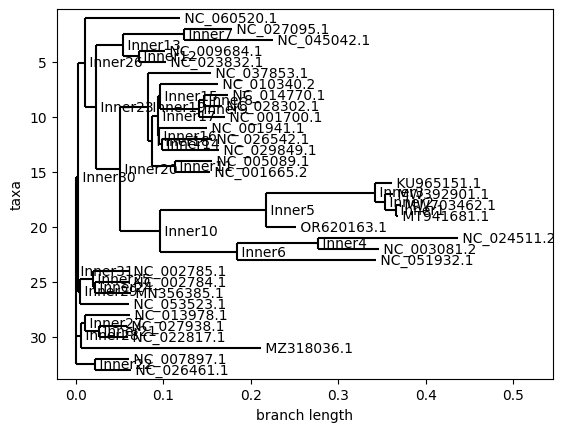

In [38]:
# TODO: Visualize and save the constructed trees
from Bio import Phylo
# Phylo.draw(tree, do_show=False)
# Phylo.write(tree, 'tree_output.xml', 'phyloxml')
tree=Phylo.read('trees/nj-tree.newick',format='newick')
Phylo.draw(tree)


### Step 6: In-Depth Phylogenetic Tree Visualization

Having constructed phylogenetic trees using different methods, our next task is to visualize these trees effectively. This step is crucial for interpreting the results and communicating our findings.

#### Visualization Tools:

1. **FigTree**:
    - **Overview**: FigTree is designed for the graphical representation of phylogenetic trees. It's excellent for creating publication-ready visualizations.
    - **Resource**: [FigTree Tool](http://tree.bio.ed.ac.uk/software/figtree/)
    - **Usage**: Use FigTree to add detailed annotations, adjust branch colors, and format tree layouts for clear, interpretable visualizations.

2. **iTOL (Interactive Tree Of Life)**:
    - **Overview**: iTOL is a web-based tool for the display, annotation, and management of phylogenetic trees, offering extensive customization options.
    - **Resource**: [iTOL Website](https://itol.embl.de/)
    - **Usage**: Ideal for interactive tree visualizations. It allows users to explore different layers of data through their tree, such as adding charts or color-coding branches.

3. **Dendroscope**:
    - **Overview**: Dendroscope is a software program for viewing and editing phylogenetic trees, particularly useful for large datasets.
    - **Resource**: [Dendroscope Download](https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/algorithms-in-bioinformatics/software/dendroscope/)
    - **Usage**: Utilize Dendroscope when dealing with large and complex trees or when you need to compare multiple trees side-by-side.

#### Task:

- **Visualize Each Tree**: Use one or more of the above tools to visualize the phylogenetic trees you constructed using Bayesian inference, maximum likelihood, and neighbor-joining methods.
- **Highlight Differences**: Focus on highlighting the differences and similarities between the trees obtained from the different methods. Pay attention to tree topology, branch lengths, and any notable patterns.
- **Interpretation and Presentation**: Aim for visualizations that are not only accurate but also interpretable and visually appealing. This will enhance the clarity of your work.

For Neighbor joining tree, the image is constructed using Dendroscope:

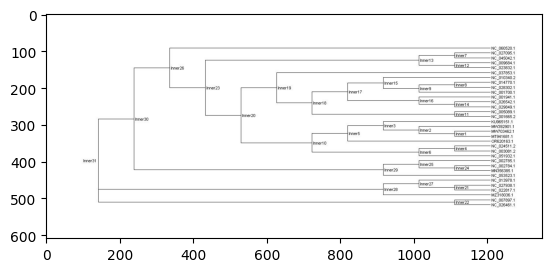

In [41]:
import matplotlib.pylab as plt

nj_image=plt.imread('nj-tree.jpg')
plt.imshow(nj_image)


### Cross-Disciplinary Applications (Optional)

This is an optional part with bonus, relative to the depth of your analysis. Refer to the first part of this notebook. You have complete freedom to do this part anyway you like, but to gain a portion of the bonus score for this section, a bare minimum effort is required.

### Conclusion and Reflective Insights

As we conclude our exploration of phylogenetic tree construction and analysis, let's reflect on the insights learned from this task and consider questions that emerge from our findings.

#### Interpretation of Results:

- Reflect on the phylogenetic trees produced by each method (Bayesian inference, maximum likelihood, and neighbor-joining). Consider how the differences in tree topology might offer varied perspectives on the evolutionary relationships among the species.

#### Questions to Ponder:

1. **Species Divergence**: Based on the trees, which species appear to have the most ancient divergence? How might this information contribute to our understanding of their evolutionary history?
   
2. **Common Ancestors**: Are there any unexpected pairings or groupings of species that suggest a closer evolutionary relationship than previously thought? How could this reshape our understanding of these species' evolutionary paths?

3. **Methodology Insights**: Considering the discrepancies between the trees generated by different methods, what might this tell us about the limitations and strengths of each phylogenetic analysis method?

4. **Conservation Implications**: Considering the evolutionary relationships revealed in your phylogenetic analysis, what insights can be gained for conservation strategies? Specifically, how could understanding the close evolutionary ties between species, which might be facing distinct environmental challenges, guide targeted conservation efforts?

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>


<ol>
<li>
The species that appear to have the most ancient divergence are typically those that are located at the base or root of the tree.Based on Neighbor Joining Tree, it seems that species NC_007897 (zebra finch) and NC_026461 (American cow) are the likely to have the most ancient divergence, because there is only one branch between them and the root, meaning that their evolutionary path is likely to be shorter than others; Hence they are possibly more ancient.
<li>
Yes. as we can see from Neighbor Joining tree, species NC_007897 (zebra finch) and NC_026461 (American cow) have a common ancestor and close in the tree. On the other hand, there are also species that are close in the tree and are also considered close based on current classifications or understanding, like lion and tiger.
Unexpected pairings or groupings in a phylogenetic tree can suggest a closer evolutionary relationship than previously thought. These could be identified by looking for species that are grouped together on the tree but are not considered closely related based on current classifications or understanding. This could reshape our understanding of these species’ evolutionary paths by suggesting new hypotheses about common ancestry and patterns of evolution.
<li>

<li>
Phylogenetic trees can provide valuable insights for conservation strategies. Species that are closely related may share similar traits or vulnerabilities, so threats to one species may also apply to its close relatives. Understanding these relationships can help in developing targeted conservation efforts. For example, if a species is facing a particular environmental challenge, closely related species might also be susceptible to the same challenge, even if they inhabit different environments. Conservation strategies could then be developed to protect these species as a group.

</ol>